# Fill that cart!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos proporcionado tiene modificaciones del original. Se redujo el tamaño del conjunto para que los cálculos se hicieran más rápido y se introdujeron valores ausentes y duplicados. Se tuvo cuidado de conservar las distribuciones de los datos originales al hacer los cambios.

## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`instacart_orders.csv`, `products.csv`, `aisles.csv`, `departments.csv` y `order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente (recuarda guardarlos en el mismio). Verifica la información para cada DataFrame creado.


## Plan de solución

Un posible plan de solución:

1. Se importarán las librerias con las que se ha trabajado hasta ahora (pandas, numpy y pyplot)
2. Se leerán los datos con la librería de Pandas.
3. Observando los datos, se tiene que usar un delimitador ya que las columnas estan separadas por ";"
4. Se obtendrá la información mediante el método ".info()" para tener un idea general de cada dataframe como valores nulos, dimensiones de los dataframes, nombres de columnas y tipo de datos


In [34]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [36]:
# leer conjuntos de datos en los DataFrames
# Conjunto 'instacart_orders'
df_orders = pd.read_csv('instacart_orders.csv', delimiter=';')
# Conjunto 'products'
df_products = pd.read_csv('products.csv', delimiter=';')
# Conjunto 'aisles'
df_aisles = pd.read_csv('aisles.csv', delimiter=';')
# Conjunto 'departments'
df_departments = pd.read_csv('departments.csv', delimiter=';')
# Conjunto 'order_products'
df_order_products = pd.read_csv('order_products.csv', delimiter=';')

In [37]:
# mostrar información del DataFrame
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [38]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [39]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [40]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [41]:
# mostrar información del DataFrame
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Primeras conclusiones:

1. Los dataframes "df_orders" y "df_products" contienen datos nulos.
2. Se tienen tipos de datos "int64", "float64" y "object"
3. El dataframe que más usa memoria es "df_order_products"
4. El dataframe que menos usa memoria es "df_departments"
5. Se debe hacer un análisis más profundo de los datos para saber si los datos tienen sentido o se deben modificar

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Posible plan de solución para el paso 2:

1. Verificar que las columnas de los dataframes pertenezcan al tipo de datos correcto para su análisis y si no cambiarlos mediante "astype()" u otro métido.
2. A partir de la información antes obtenida, se encontrarán y eliminarán los valores nulos que afecten el análisis posterior de los datos, primero mediante el comando "isna()" se encontraran y con "value_counts" o "sum()" se contarán
3. Se encontrarán y eliminarán los valores duplicados que afecten el análisis posterior de los datos, mediante "duplicated()" se encontrarán estos valores y se aplicaran las restricciones lógicas para entender porqué están ahí esos valores duplicados y tomar una desición de que hacer con ellos, ya se eliminarlos, sumarlos, o ignorarlos.
 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [53]:
# Se revisa primero los valores nulos de df_orders
print(df_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [55]:
# Revisa si hay pedidos duplicados
# Se imprimen los valores duplicados
print(df_orders[df_orders.duplicated()])
# Se impreme el numero de valores duplicados para corroborar
print(df_orders.duplicated().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

**Observaciones:**

Se tienen 15 líneas duplicadas, todas hechas el día miércoles y a las 2am, algunos valores en la columna 'days_since_prior_order' están vacíos lo que se presupone como 0 dias transcurridos desde el pedido

In [58]:
# de los hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday_orders = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]

# Mostrar los resultados
print(wednesday_orders.head(25))
print(len(wednesday_orders))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
25376    1378085    75705            21          3                  2   
26301    2846262   176827             2          3                  2   
29129     353088    46038             4          3                  2   
30371    1918001   188546            14          3                  2   
31404    1725788   147843            10          3                  2   
48024    1453300    69262            27          3                  2   
52245    2851380   118608            33          3                  2   
62357    1399416    93151            34          3 

**Interpretación:**

Puede sugerir que los pedidos hechos el miércoles a las 2 am tienden a duplicarse por algún motivo y tienen que ser revisados. 

In [61]:
# Elimina los pedidos duplicados
drop_duplicate_orders = df_orders.drop_duplicates()

# Mostrar resultados
print(drop_duplicate_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [154]:
# Vuelve a verificar si hay filas duplicadas
print(drop_duplicate_orders[drop_duplicate_orders.duplicated()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [155]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(drop_duplicate_orders[drop_duplicate_orders['order_id'].duplicated()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


**Obervaciones:**

Se encontraron 15 filas duplicadas para el día miércoles a las 2 am lo que puede implicar problemas al registrar los pedidos en estas fechas puede ser por actualizaciónes en los servidores,e etc... por lo que conviene revisar estas órdenes. Posteriormente se eliminaron para tener un dataframe más limpio.

### `products` data frame

In [156]:
# Se revisa primero los valores nulos de df_orders
print(df_products.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [157]:
# Verifica si hay filas totalmente duplicadas
print(df_products[df_products.duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [158]:
# Revisa únicamente si hay ID de departamentos duplicados
print(df_products[df_products['department_id'].duplicated()])

       product_id                                     product_name  aisle_id  \
4               5                        Green Chile Anytime Sauce         5   
6               7                   Pure Coconut Water With Orange        98   
7               8                Cut Russet Potatoes Steam N' Mash       116   
9              10   Sparkling Orange Juice & Prickly Pear Beverage       115   
10             11                                Peach Mango Juice        31   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
4               

In [159]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(df_products[df_products['product_name'].str.upper().duplicated()])

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [160]:
# Revisa si hay nombres duplicados de productos no faltantes
nonmissing_products=df_products[~df_products['product_name'].isna()]
print(nonmissing_products[nonmissing_products['product_name'].str.upper().duplicated()])

       product_id                                     product_name  aisle_id  \
2058         2059                                  Biotin 1000 Mcg        47   
5455         5456                 Green Tea With Ginseng and Honey        96   
5558         5559                           Cream Of Mushroom Soup        69   
7558         7559                        Cinnamon Rolls with Icing       105   
9037         9038                           American Cheese slices        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

**Observaciones:**
1. No hay filas duplicadas pero hay dos columnas con datos duplicados que había que analizar.
2. "department_id" tiene 49673 datos duplicados, lo que no afecta el análisis.
3. "product_name" tiene 1361 datos duplicados, estos nombres se pusieron en mayúsculas para una mejor compración.
4. Después se filtraron los nombres de productos duplicados no faltantes lo cuales son 104, pocos a comparación con los de datos faltantes. Podríamos decir que estos productos se encuentran en varios departamentos o tal vez hasta pasillos

### `departments` data frame

In [161]:
# Se revisa primero los valores nulos de df_orders
print(df_departments.isna().sum())

department_id    0
department       0
dtype: int64


In [162]:
# Revisa si hay filas totalmente duplicadas
print(df_departments[df_departments.duplicated()])
print(df_departments.duplicated().sum())

Empty DataFrame
Columns: [department_id, department]
Index: []
0


In [163]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_departments[df_departments['department_id'].duplicated()])
print(df_departments[df_departments['department'].duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []
Empty DataFrame
Columns: [department_id, department]
Index: []


**Observaciones:**

Este dataframe se analizó y no cuenta con datos duplicados ni en sus filas ni en sus columnas, tampoco cuenta con valores nulos

### `aisles` data frame

In [164]:
# Se revisa primero los valores nulos de df_orders
print(df_aisles.isna().sum())

aisle_id    0
aisle       0
dtype: int64


In [165]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles[df_aisles.duplicated()])
print(df_aisles.duplicated().sum())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []
0


In [166]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_aisles[df_aisles['aisle_id'].duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


**Observaciones:**

Este dataframe se analizó y no cuenta con datos duplicados ni en sus filas ni en sus columnas, tampoco cuenta con valores nulos

### `order_products` data frame

In [167]:
# Se revisa primero los valores nulos de df_orders
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [168]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products[df_order_products.duplicated()])
print(df_order_products.duplicated().sum())

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
0


In [169]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

# Buscamos los valores unicos por columna
for column in df_order_products:
    print(len(df_order_products[column].unique()))
    
# Verificar duplicados exactos
exact_duplicates = df_order_products[df_order_products.duplicated()]

# Verificar duplicados basados en la combinación de 'order_id' y 'product_id'
combination_duplicates = df_order_products[df_order_products.duplicated(subset=['order_id', 'product_id'])]

# Mostrar resultados
print(f"Número de filas duplicadas exactas: {exact_duplicates.shape[0]}")
print(f"Número de duplicados en la combinación de 'order_id' y 'product_id': {combination_duplicates.shape[0]}")

450046
45573
65
2
Número de filas duplicadas exactas: 0
Número de duplicados en la combinación de 'order_id' y 'product_id': 0


**Observaciones:**

Al analizar la naturaleza de los datos en este dataframe, es importante observar duplicados en las columnas 'order_id', 'product_id' ni una combinación entre ellas, también me pareció curioso de primera instancia observar el número de valores unicos por columna y los resultados fueron negativos para duplicados, lo que nos indica que no hay más que hacer en el preprocesamiento para este dataframe.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [170]:
# Encuentra los valores ausentes en la columna 'product_name'
#print(df_products[(df_products['product_name'].isna()) & (df_products['aisle_id']==100) & (df_products['department_id']==21)])
print(df_products[df_products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


**Observaciones:**

El dataframe impresó nos dice que a primera vista, al parecer los 1258 valores nulos de 'product_name' estan en valores de 'aisle_id'=100 y 'department_id'=21, se debe corroborar esta hipótesis

In [171]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_products[(df_products['product_name'].isna()) & (df_products['aisle_id']==100)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Después del resultado anterior que es el mismo al encontrar valores ausentes podemos responder que sí, todos los nombres de productos ausentes están relocionados con el pasillo con ID 100

**Observaciones:**

La primera hipótesis se confirma los 1258 valores nulos de 'product_name' estan en valores de 'aisle_id'=100

In [172]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[(df_products['product_name'].isna()) & (df_products['department_id']==21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


**Observaciones:**

Después del resultado anterior que es el mismo al encontrar valores ausentes podemos responder que sí, todos los nombres de productos ausentes están relocionados con el departamente de ID 21 ya que también tienen las mismas dimensiones que el primero

In [173]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_products[(df_products['aisle_id']==100) & (df_products['department_id']==21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos. Se cumplen las dos hipótesis con el último dataframe mostrado

In [174]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna("Unknown",inplace=True)
# Mostramos los valores nulos en el dataframe corregido
print(df_products['product_name'].isna().sum())

0


**Observaciones:**

Se calcularon los datos nulos de la columna 'product_name' y se reemplezaron con 'Unknown' y se comprobó reimprimiendo el número de valores nulos

### `orders` data frame

In [175]:
# Encuentra los valores ausentes
print(df_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [176]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(df_orders[(df_orders['days_since_prior_order'].isna()) & (df_orders['order_number']==1)])


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

**Observaciones:**

Se imprimieron los valores nulos que coinciden con el primer pedido y tiene el mismo tamaño que el número de valores nulos, por lo que se confirma que todos los valores nulos estan en la primera orden.

### `order_products` data frame

In [177]:
# Encuentra los valores ausentes
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [178]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('El valor máximo en add_to_cart_order es:', df_order_products['add_to_cart_order'].max(axis=0))
print('El valor mínimo en add_to_cart_order es:', df_order_products['add_to_cart_order'].min(axis=0))

El valor máximo en add_to_cart_order es: 64.0
El valor mínimo en add_to_cart_order es: 1.0


**Observaciones:**

Hay 836 valores nulos en la columna 'add_to_cart_order' y el valor máximo es de 64 y el mínimo de 1, puede ser que los valores nulos sean porque las órdenes no pasaron por el carrito o que fueron tantas órdenes que se registraron como valor nulo.

In [179]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ids_nan=df_order_products['order_id'][df_order_products['add_to_cart_order'].isna()]
print(ids_nan)

# O también

missing_add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'].isna()]

# Guardar las IDs de pedidos que tienen valores ausentes en 'add_to_cart_order'
order_ids_with_missing_add_to_cart_order = missing_add_to_cart_order['order_id'].tolist()
print(order_ids_with_missing_add_to_cart_order)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64
[2449164, 1968313, 2926893, 1717990, 1959075, 844733, 61355, 936852, 264710, 1717990, 1564093, 129627, 264710, 293169, 2849370, 1386261, 3308010, 903110, 2136777, 3347453, 1888628, 165801, 2449164, 2094761, 3347453, 1038146, 2136777, 2997021, 844733, 844733, 2136777, 813364, 165801, 2256933, 171934, 264710, 2449164, 2409109, 3347453, 813364, 2926893, 936852, 1730767, 1169835, 733526, 844733, 293169, 61355, 903110, 1968313, 733526, 2136777, 2926893, 404157, 1386261, 171934, 3125735, 747668, 3308010, 1169835, 1800005, 1961723, 936852, 2849370, 3308010, 61355, 871281, 1717990, 813364, 388234, 61355, 3125735, 1959075, 61355, 3125735, 1648217, 171934, 3125735, 61355, 1477139, 1959075, 1717990, 1717990, 61355, 1717990, 171934, 1038146, 3308010, 

In [180]:
# Este código sólo sirve para comprobar las veces que se repite el numero de 'order_id' en toda la columna
count=0
for n in df_order_products['order_id']:
    if n==9310:
        count=count+1
print(count)

65


In [181]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
df_order_products_nan=df_order_products[df_order_products['add_to_cart_order'].isna()]

df_order_products_nan = df_order_products_nan['order_id'].unique()

print(df_order_products_nan)

products_by_order=df_order_products.groupby('order_id').size()
print(products_by_order)

missing_order_product_counts=products_by_order[df_order_products_nan]

print(len(missing_order_product_counts.loc[missing_order_product_counts>64]))

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
group_ids_nan=df_order_products[df_order_products['add_to_cart_order'].isna()]
group_ids_nan=group_ids_nan.groupby('order_id')
for order_id, group in group_ids_nan:
    print(f"Order ID: {order_id}")
    print(group)
    print("\n")
    
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
# Agrupar los datos ausentes por 'order_id' y contar el número de 'product_id' en cada grupo
product_count_per_order = missing_add_to_cart_order.groupby('order_id')['product_id'].count()

# Encontrar el valor mínimo del conteo
min_product_count = product_count_per_order.min()

# Mostrar el resultado
print("El valor mínimo del conteo de 'product_id' en pedidos con valores ausentes en 'add_to_cart_order' es:", min_product_count)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]
order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Length: 450046, dtype: int64
70
Order ID: 9310
         order_id  product_id  add_to_cart_order  reordered
2437093      9310       25753                NaN          0


Order ID: 61355
         order_id  product_id  add_to_cart_order  reordered
57981       61355      

**Observaciones:**

Al agrupar por order_id, se oberva que el id más repetido es 61355 con 63 repeticiones y hay más de 1 que estan repetidos una sola vez. Hay 70 diferentes datos repetidos 

In [182]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order']=df_order_products['add_to_cart_order'].astype(int)
print(df_order_products['add_to_cart_order'])

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


In [183]:
missing_add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'].isna()]
print(missing_add_to_cart_order)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


**Observaciones:**

Ya identificados los valores nulos, se procedió a cambiarlos por el número 999 y se cambio a un tipo de dato de float64 a int64, por último se verificó que no hubiera más datos vacíos

## Conclusiones

1. El preprocesamiento puede parecer un poco largo y tedioso pero también empieza a ser interesante cuando empezamos a encontrar patrones y relaciones entre los datos.
2. Se pueden tener muchas conclusiones e hipótesis al realizar el preprocesamiento.
3. Al final se reemplazaron los valores nulos necesarios para seguir con el procesamiento y graficado de los datos.
4. Al final se analizaron y eliminaron los valores duplicados necesarios para seguir con el procesamiento y graficado de los datos.

# Paso 3. Análisis de los datos


# [A]

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [184]:
print('El valor máximo en order_hour_of_day es:', df_orders['order_hour_of_day'].max())
print('El valor mínimo en order_hour_of_day es:', df_orders['order_hour_of_day'].min())

El valor máximo en order_hour_of_day es: 23
El valor mínimo en order_hour_of_day es: 0


In [185]:
print('El valor máximo en order_dow es:', df_orders['order_dow'].max())
print('El valor máximo en order_dow es:', df_orders['order_dow'].min())

El valor máximo en order_dow es: 6
El valor máximo en order_dow es: 0


**Observaciones:**

Parece que los datos cumplen con ser razonables, son valores enteros cuyo máximo y minimos coinciden con valores razonables para la hora del día y el día de la semana, se puede continuar con el siguiente paso

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

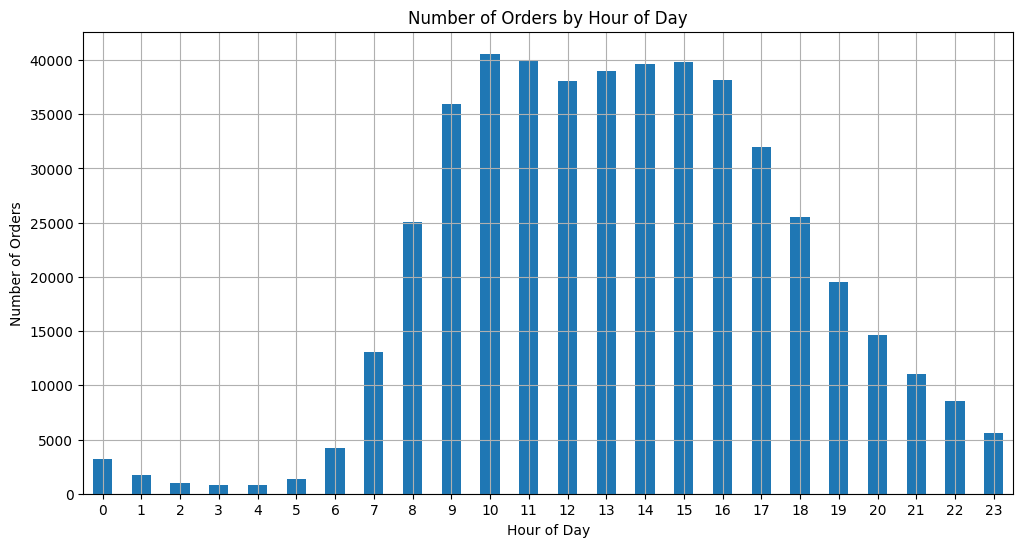

In [186]:
order_counts_by_hour = df_orders['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
order_counts_by_hour.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of Day')
plt.xticks(rotation=0)
plt.grid(True)

**Observaciones:**

Se observa que los datos cumplen con una distrubución parecida a una distribución normal con el pico de órdenes más alto para las 10am y un mínimo a las 3am, entre las 9am y las 4pm se localizan las órdenes por encima de 35000 y menos de 5000 en la madrugada de las 24hrs hasta las 6am.

### [A3] ¿Qué día de la semana compran víveres las personas?

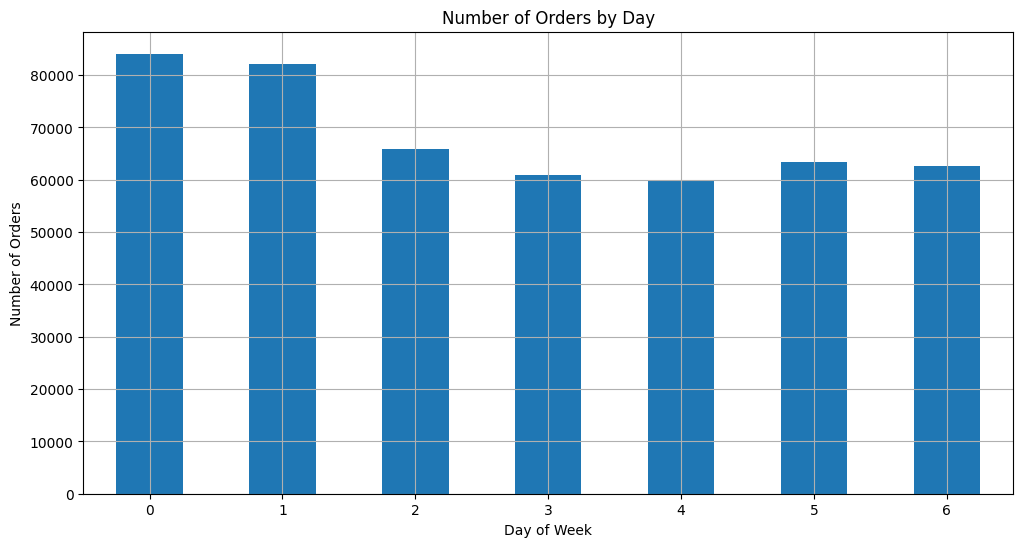

In [187]:
order_counts_by_hour = df_orders['order_dow'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
order_counts_by_hour.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day')
plt.xticks(rotation=0)
plt.grid(True)

**Observaciones:**

Se observa que el mayor número de ordenes se da el día domingo más de 80000 órdenes registradas y el menor número de órdenes el día jueves con aproximadamente 60000 órdenes

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

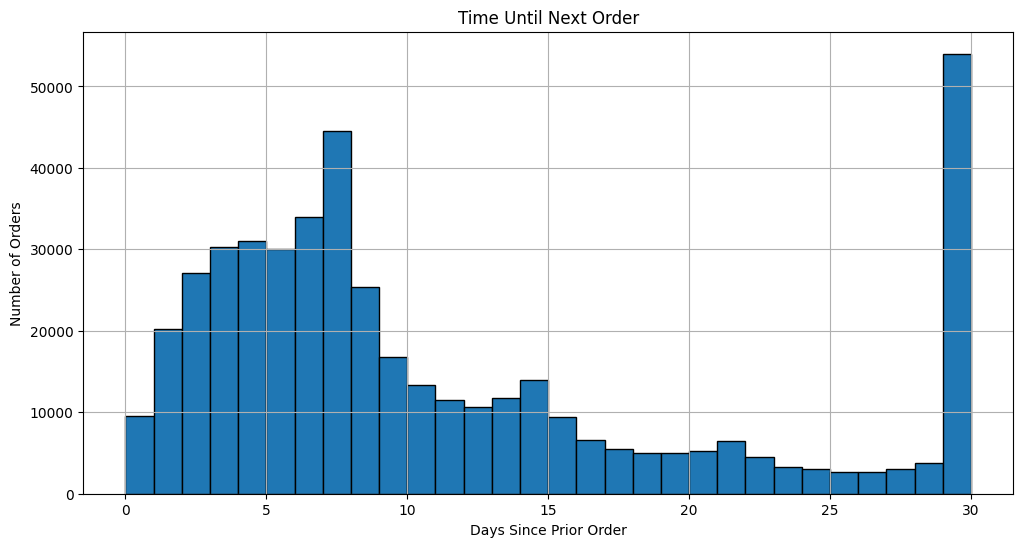

In [188]:
plt.figure(figsize=(12, 6))
df_orders['days_since_prior_order'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.title('Time Until Next Order')
plt.grid(True)
# Mostrar el gráfico
plt.show()

In [189]:
# Comentar sobre los valores mínimos y máximos
min_days = df_orders['days_since_prior_order'].min()
max_days = df_orders['days_since_prior_order'].max()

print(f"El valor mínimo de días hasta el siguiente pedido es: {min_days}")
print(f"El valor máximo de días hasta el siguiente pedido es: {max_days}")

El valor mínimo de días hasta el siguiente pedido es: 0.0
El valor máximo de días hasta el siguiente pedido es: 30.0


**Observaciones:**

Se observa que los picos de días de espera son el día 8 y el día 30 y que la mayoría de las personas esperan menos de 15 días para realizar otro pedido y si esperan más de eso, la mayoría espera hasta los 30 días. Los mínimos se observan en los días 26 y 27

# [B] 
1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [190]:
# Extraemos los datos del miércoles y sábado
wednesday_orders=df_orders[df_orders['order_dow']==3]
saturday_orders=df_orders[df_orders['order_dow']==6]

In [191]:
# Extraemos los datos del miércoles y sábado por hora y los listamos de forma ascendente
order_counts_wednesday = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
order_counts_saturday = saturday_orders['order_hour_of_day'].value_counts().sort_index()

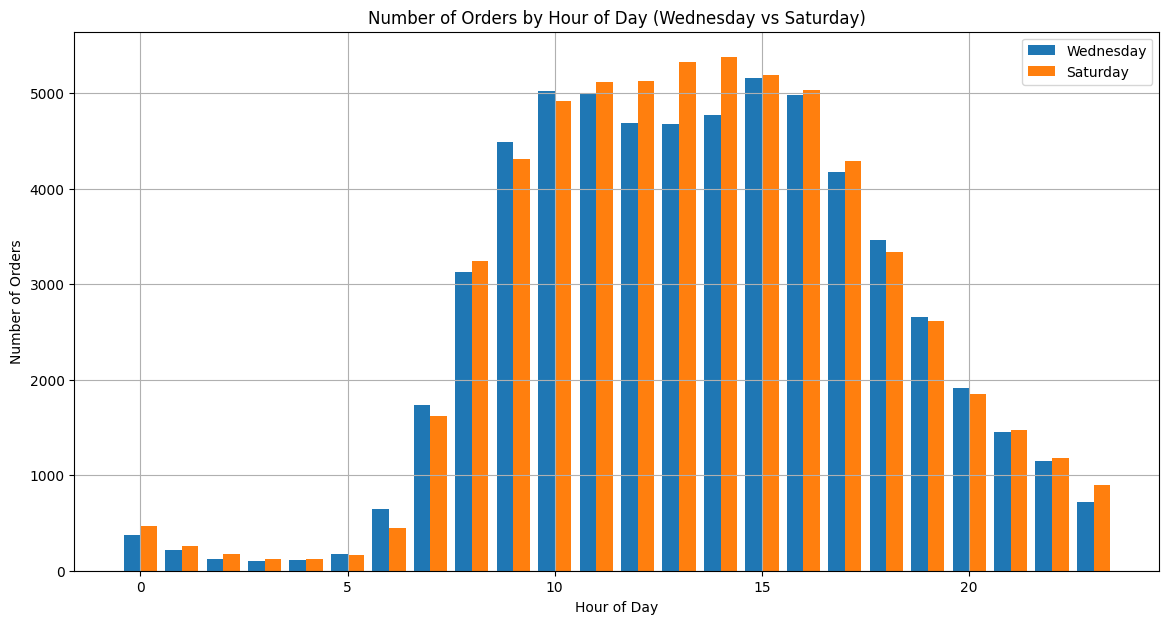

In [192]:
# Mostramos resultados
plt.figure(figsize=(14, 7))

plt.bar(order_counts_wednesday.index - 0.2, order_counts_wednesday.values, width=0.4, label='Wednesday', align='center')
plt.bar(order_counts_saturday.index + 0.2, order_counts_saturday.values, width=0.4, label='Saturday', align='center')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of Day (Wednesday vs Saturday)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [193]:
# Describir las diferencias observadas
print("Análisis de las distribuciones de 'order_hour_of_day' para los miércoles y los sábados:")
print(f"Pedidos los miércoles: {order_counts_wednesday.describe()}")
print(f"Pedidos los sábados: {order_counts_saturday.describe()}")

Análisis de las distribuciones de 'order_hour_of_day' para los miércoles y los sábados:
Pedidos los miércoles: count      24.00000
mean     2538.00000
std      1993.55878
min       101.00000
25%       575.50000
50%      2284.50000
75%      4677.50000
max      5163.00000
Name: order_hour_of_day, dtype: float64
Pedidos los sábados: count      24.000000
mean     2610.375000
std      2075.716614
min       118.000000
25%       460.750000
50%      2228.500000
75%      4946.500000
max      5375.000000
Name: order_hour_of_day, dtype: float64


**Observaciones:**

Los dos días siguen una distribución cualitativamente parecida, en ambos hay el mismo número de pedidos aunque hay un promedio más grande los sábados y por lo tanto una desviación estandar mayor. El mínimo y el máximo más grandes se encuentran también el sábado.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

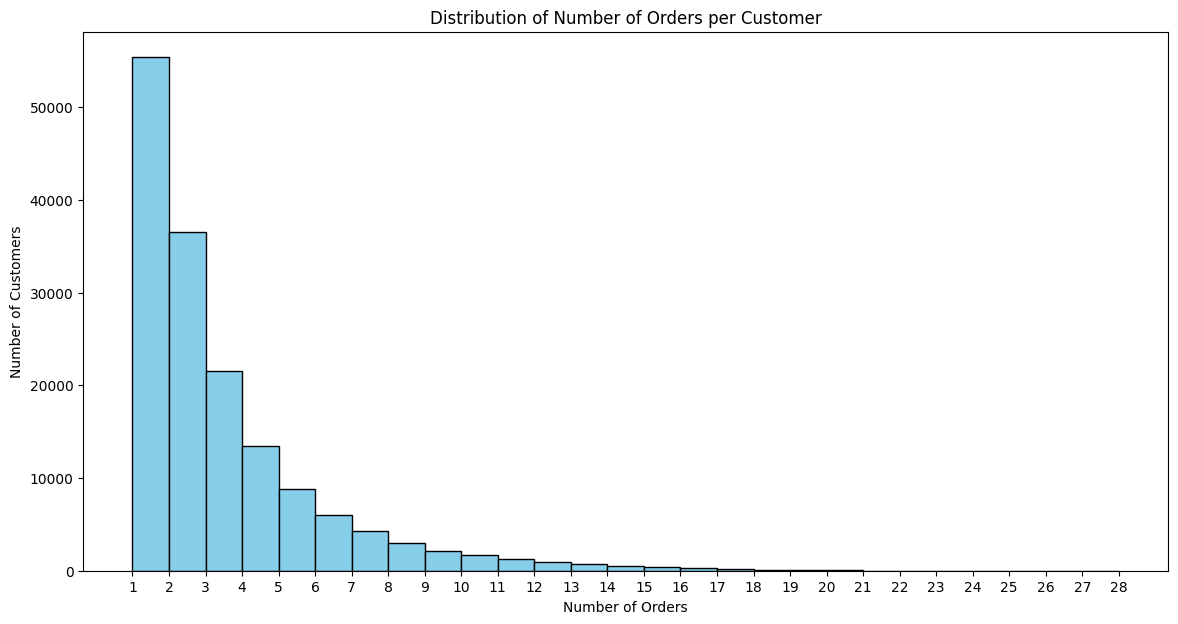

In [194]:
# Agrupar por 'user_id' y contar el número de pedidos por cliente
order_counts = df_orders.groupby('user_id')['order_id'].count()

# Contar la frecuencia de cada número de pedidos
order_counts_distribution = order_counts.value_counts().sort_index()

# Crear un histograma para mostrar la distribución del número de órdenes por cliente
plt.figure(figsize=(14, 7))

# Graficar el histograma
plt.hist(order_counts, bins=range(1, order_counts.max() + 1), edgecolor='black', color='skyblue')

# Etiquetas y título del gráfico
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Number of Orders per Customer')
plt.xticks(range(1, order_counts.max() + 1))

# Mostrar el gráfico
plt.show()

**Observaciones:**

La mayoría de los clientes haces menos de pedidos y el el pico de clientes hace un pedido solamente. practicamente no hay clientes que hagan más de 18 órdenes. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [195]:
product_counts = df_order_products['product_id'].value_counts().head(20)

# Unir con el DataFrame products para obtener los nombres de los productos
top_products = pd.merge(product_counts.reset_index(), df_products, left_on='index', right_on='product_id', how='left')

# Seleccionar solo las columnas de interés y renombrarlas
top_products = top_products[['product_id_y', 'product_name', 'product_id_x']]
top_products.columns = ['product_id', 'product_name', 'order_count']

# Mostrar los 20 principales productos
print(top_products)

    product_id              product_name  order_count
0        24852                    Banana        66050
1        13176    Bag of Organic Bananas        53297
2        21137      Organic Strawberries        37039
3        21903      Organic Baby Spinach        33971
4        47209      Organic Hass Avocado        29773
5        47766           Organic Avocado        24689
6        47626               Large Lemon        21495
7        16797              Strawberries        20018
8        26209                     Limes        19690
9        27845        Organic Whole Milk        19600
10       27966       Organic Raspberries        19197
11       22935      Organic Yellow Onion        15898
12       24964            Organic Garlic        15292
13       45007          Organic Zucchini        14584
14       39275       Organic Blueberries        13879
15       49683            Cucumber Kirby        13675
16       28204        Organic Fuji Apple        12544
17        5876             O

**Observaciones:**

La mayoría de los productos en la primera posición son frutas. Parece ser que los productos más populares son los dicen orgánico.

# [C]

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [196]:
order_item_counts = df_order_products.groupby('order_id').size()

# Calcular estadísticas descriptivas
print(order_item_counts.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


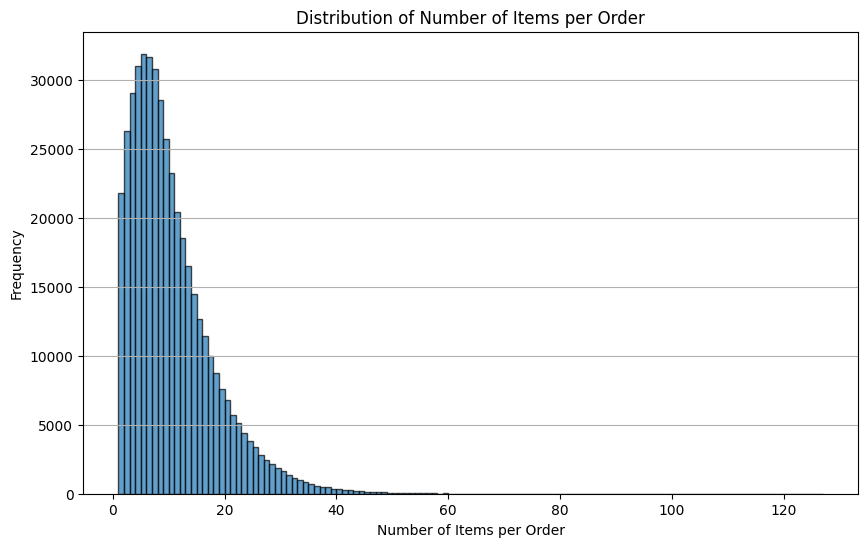

In [197]:
# Visualizar la distribución con un histograma
plt.figure(figsize=(10, 6))
plt.hist(order_item_counts, bins=range(1, order_item_counts.max() + 1), edgecolor='k', alpha=0.7)
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

**Observaciones:**

La mayoría de las personas pide entre 1 y 23 productos por órden con más frecuencia, el pico se encuentra en 9 productos por orden, casi nadie compra a partir de 40 productos o más

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [198]:
# Filtrar los productos que han sido reordenados
reordered_products = df_order_products[df_order_products['reordered'] == 1]

# Contar la frecuencia de cada producto reordenado
reordered_counts = reordered_products['product_id'].value_counts().head(20)

# Obtener los nombres e IDs de los productos reordenados con mayor frecuencia
top_reordered_products = reordered_counts.reset_index()
top_reordered_products.columns = ['product_id', 'reorder_count']
top_reordered_products = top_reordered_products.merge(df_products[['product_id', 'product_name']], on='product_id')

# Mostrar los 20 principales productos reordenados con mayor frecuencia
print(top_reordered_products)

    product_id  reorder_count              product_name
0        24852          55763                    Banana
1        13176          44450    Bag of Organic Bananas
2        21137          28639      Organic Strawberries
3        21903          26233      Organic Baby Spinach
4        47209          23629      Organic Hass Avocado
5        47766          18743           Organic Avocado
6        27845          16251        Organic Whole Milk
7        47626          15044               Large Lemon
8        27966          14748       Organic Raspberries
9        16797          13945              Strawberries
10       26209          13327                     Limes
11       22935          11145      Organic Yellow Onion
12       24964          10411            Organic Garlic
13       45007          10076          Organic Zucchini
14       49683           9538            Cucumber Kirby
15       28204           8989        Organic Fuji Apple
16        8277           8836  Apple Honeycrisp 

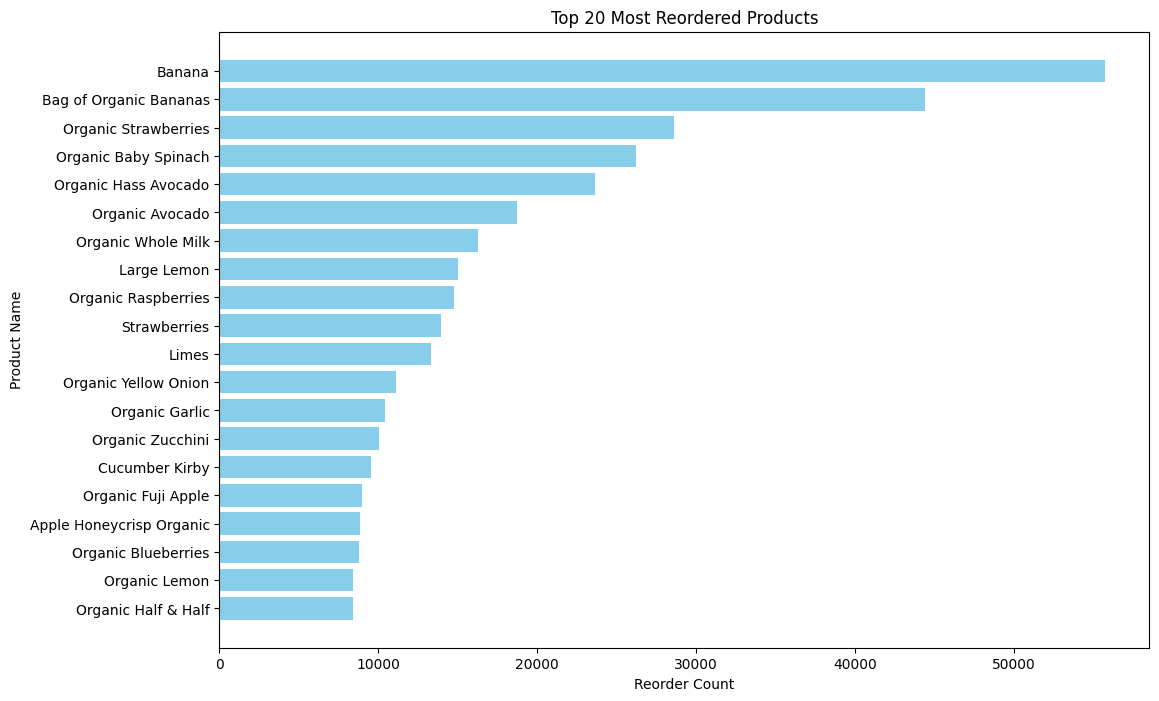

In [199]:
# Graficar los resultados
plt.figure(figsize=(12, 8))
plt.barh(top_reordered_products['product_name'], top_reordered_products['reorder_count'], color='skyblue')
plt.xlabel('Reorder Count')
plt.ylabel('Product Name')
plt.title('Top 20 Most Reordered Products')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el producto con más reordenes en la parte superior
plt.show()

**Observaciones:**

El producto más se vuelve a pedir son las bananas, cos los dos primeros lugares, seguido de las fresas, las espicas, el aguacate hass y el aguacate orgánico. El menos pedido de estos primeros 20 es el half & half organico

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [200]:
# Calcular el número total de veces que cada producto se ha pedido
total_orders = df_order_products['product_id'].value_counts()

# Calcular el número total de veces que cada producto se ha reordenado
reordered_counts = reordered_products['product_id'].value_counts()

# Calcular la proporción de reordenes respecto al total de pedidos
proportion_reordered = reordered_counts / total_orders

# Convertir los resultados a un DataFrame
proportion_reordered_df = proportion_reordered.reset_index()
proportion_reordered_df.columns = ['product_id', 'reorder_proportion']

# Fusionar con el DataFrame de productos para obtener los nombres de los productos
proportion_reordered_df = proportion_reordered_df.merge(df_products[['product_id', 'product_name']], on='product_id')

# Mostrar los resultados
print(proportion_reordered_df)


# Contar el número total de veces que se ha pedido cada producto
total_orders_per_product = df_order_products['product_id'].value_counts()

# Contar el número de veces que se ha vuelto a pedir cada producto
reordered_orders_per_product = df_order_products[df_order_products['reordered'] == 1]['product_id'].value_counts()

# Calcular la proporción de veces que un producto se vuelve a pedir respecto al total de veces que se ha pedido ese producto
reorder_proportion_per_product = reordered_orders_per_product / total_orders_per_product

# Convertir los resultados a un DataFrame
reorder_proportion_per_product_df = reorder_proportion_per_product.reset_index()
reorder_proportion_per_product_df.columns = ['product_id', 'reorder_proportion']

# Mostrar los resultados
print(reorder_proportion_per_product_df)
print('El valor máximo en reorder_proportion es:', reorder_proportion_per_product_df['reorder_proportion'].max())
print('El valor mínimo en reorder_proportion es:', reorder_proportion_per_product_df['reorder_proportion'].min())
print(reorder_proportion_per_product_df[reorder_proportion_per_product_df['reorder_proportion'].isna()])

       product_id  reorder_proportion  \
0               1            0.564286   
1               2                 NaN   
2               3            0.738095   
3               4            0.510204   
4               7            0.500000   
...           ...                 ...   
45568       49690            0.800000   
45569       49691            0.430556   
45570       49692            0.416667   
45571       49693            0.440000   
45572       49694            0.333333   

                                            product_name  
0                             Chocolate Sandwich Cookies  
1                                       All-Seasons Salt  
2                   Robust Golden Unsweetened Oolong Tea  
3      Smart Ones Classic Favorites Mini Rigatoni Wit...  
4                         Pure Coconut Water With Orange  
...                                                  ...  
45568                      HIGH PERFORMANCE ENERGY DRINK  
45569                      ORIGINAL

**Observaciones:**

El valor máximo de reorder_proportion es 1 y el mínimo es 0.01098901098901099, se evaluaron 9345 valores nulos, lo cual indica que el total de órdenes es 0 para estos productos

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [201]:
# Fusionar las tablas de pedidos y productos pedidos en una sola tabla
df_merged = df_orders.merge(df_order_products, on='order_id')

# Agrupar por user_id para calcular el número total de productos pedidos por cada cliente
total_products_per_user = df_merged.groupby('user_id')['product_id'].count()

# Agrupar por user_id y filtrar para calcular el número total de productos reordenados por cada cliente
reordered_products_per_user = df_merged[df_merged['reordered'] == 1].groupby('user_id')['product_id'].count()

# Calcular la proporción de productos reordenados respecto al total de productos pedidos por cada cliente
proportion_reordered_per_user = reordered_products_per_user / total_products_per_user

# Convertir los resultados a un DataFrame
proportion_reordered_per_user_df = proportion_reordered_per_user.reset_index()
proportion_reordered_per_user_df.columns = ['user_id', 'reorder_proportion']

# Mostrar los resultados
print(proportion_reordered_per_user_df)
print('El valor máximo en reorder_proportion es:', proportion_reordered_per_user_df['reorder_proportion'].max())
print('El valor mínimo en reorder_proportion es:', proportion_reordered_per_user_df['reorder_proportion'].min())
print(proportion_reordered_per_user_df[proportion_reordered_per_user_df['reorder_proportion'].isna()])

        user_id  reorder_proportion
0             2            0.038462
1             4                 NaN
2             5            0.666667
3             6                 NaN
4             7            0.928571
...         ...                 ...
149621   206203            0.222222
149622   206206            0.714286
149623   206207            0.891304
149624   206208            0.696000
149625   206209            0.320000

[149626 rows x 2 columns]
El valor máximo en reorder_proportion es: 1.0
El valor mínimo en reorder_proportion es: 0.014925373134328358
        user_id  reorder_proportion
1             4                 NaN
3             6                 NaN
13           20                 NaN
21           30                 NaN
24           34                 NaN
...         ...                 ...
149582   206156                 NaN
149592   206167                 NaN
149597   206175                 NaN
149605   206184                 NaN
149610   206190                 NaN


**Observaciones:**

El valor máximo de reorder_proportion es 1 y el mínimo es 0.014925373134328358, se evaluaron 16635 valores nulos lo cual indica que el total de productos por usuario es 0 para estos productos

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [210]:
# Filtrar los datos para obtener solo los artículos que se agregan primero al carrito
first_in_cart = df_order_products[df_order_products['add_to_cart_order'] == 1]

# Contar la frecuencia de cada artículo
top_first_in_cart = first_in_cart['product_id'].value_counts().reset_index()

# Renombrar las columnas
top_first_in_cart.columns = ['product_id', 'count']

# Mostrar los 20 principales artículos que se ponen primero en el carrito
print(top_first_in_cart.head(20))
print('El valor máximo en top_first_in_cart es:', top_first_in_cart['count'].max())
print('El valor mínimo en top_first_in_cart es:', top_first_in_cart['count'].min())

    product_id  count
0        24852  15562
1        13176  11026
2        27845   4363
3        21137   3946
4        47209   3390
5        21903   3336
6        47766   3044
7        19660   2336
8        16797   2308
9        27966   2024
10       44632   1914
11       49235   1797
12       47626   1737
13         196   1733
14       38689   1397
15       26209   1370
16       12341   1340
17        5785   1310
18       27086   1309
19       22935   1246
El valor máximo en top_first_in_cart es: 15562
El valor mínimo en top_first_in_cart es: 1


**Observaciones:**

El producto con id 24852 es el que más se pone en el carrito por primera vez con 15562, seguido del producto con id 13176 con 11026 veces y el mínimo con el id 22935 con 1246 veces

### Conclusion general del proyecto:

1. Este proyecto me pareció largo pero necesario para entender y familiarizarme con el tipo de datos que hay, la forma de preprocesar los datos, las maneras de graficar y visualizar la información.
2. Creo que al final de este proyecto se tiene una idea concreta de las tendencias y los patrones que siguen los clientes al ordenar y pedir productos en esta plataforma.
3. El preprocesamiento es la parte más tediodsa pero la más importante para tener buenos y confiables resultados.
4. Pandas es una libreria que ayuda mucho a manipular más rapido y simple una gran cantidad de datos.
5. Todos los métodos aprendidos fueron de utilidad al procesar la información.
6. A veces fué un difícil entender las instrucciones que se pedían.
7. Para estos datos la tendencia es que el mayor número de compras se realiza los domingos entre 10am y 4pm.
8. Los productos más vendidos y que se vuelven a pedir son los orgánicos y frutas en especial las bananas.
9. La gente tiende a comprar cinco o menos productos por pedido.